<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ADP-Nonfarm-Employment-Change" data-toc-modified-id="ADP-Nonfarm-Employment-Change-1">ADP Nonfarm Employment Change</a></span><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1.1">Description</a></span></li></ul></li><li><span><a href="#Set-Parameters" data-toc-modified-id="Set-Parameters-2">Set Parameters</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Identify-the-columns" data-toc-modified-id="Identify-the-columns-3.1">Identify the columns</a></span></li></ul></li></ul></div>

# ADP Nonfarm Employment Change


ADP Nonfarm Employment Change shows the monthly change of employment in the main sectors of the United States economy. The indicator does not take agriculture into account. The calculation includes data collected from about 406,000 private enterprises which employ up to 23 million people (about 20% of all employees of the US private sector).

Unlike the methodology adopted by the Bureau of Labor Statistics in calculating the Nonfarm Payrolls, ADP takes into account payrolls by separate employees rather than the total number of payrolls for the month. This is due to the fact that one employee can be mentioned in several payrolls (receive bonuses and other payments), thus the report data can be inaccurate.

Statistical outliers are excluded from the sample data.

The report reflects the division into sectors and industries: it provides separate data for the production sector (mining, construction, manufacturing) and the service sector (trade, transport, IT, finance, professional and technical services, management and provider services, administrative and support services, education, health care, recreation, entertainment, etc.). The report also provides a snapshot of changes in small businesses (up to 50 employees), medium (50 – 499 employees) and large businesses (more than 500 employees).

The indicator characterizes the US labor market state. It is published two days prior to the Bureau of Labor Statistics' report, so economists see it as a preview the official report.

Growth of employment is a leading indicator of consumer spending growth. The Fed takes into account the state of the labor market in its interest rate decision. Therefore, indicator growth can be seen as positive for the US dollar.
            
            
Source:
- https://www.mql5.com/en/economic-calendar/united-states/adp-nonfarm-employment-change

# Set Parameters

In [1]:
# Directory where I store original data (copied form the Web, etc.)
original_data_directory = "D:\\Drive\\market_indicators\\original\\"

# Directory where we will save data we create
derived_data_directory = "D:\\Drive\\market_indicators\\original\\"

# The file we analyze in this notebook
file_name = "united-states.adp-nonfarm-employment-change.csv"

date_format = "yyyy.mm.dd" # 2007.04.05

"yyyy.mm.dd"

# Read Data

## Identify the columns

In [2]:
using DataFrames, CSV

df = CSV.read(original_data_directory*file_name, dateformat=date_format)

for i in 1:size(df)[2] # number of columns
    println("column: ", i, " ", names(df)[i])
end

column: 1 Date
column: 2 ActualValue
column: 3 ForecastValue
column: 4 PreviousValue


In [3]:
# Sample the data

show(df[end-5:end, # row to row
        [1,2,3,4]] # column to column
    , allcols=true) # do NOT limit number of columns if more than 6

6×4 DataFrame
│ Row │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Dates.Date │ Int64       │ Int64?        │ Int64?        │
├─────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 2007-08-08 │ 48          │ missing       │ 150           │
│ 2   │ 2007-07-05 │ 150         │ missing       │ 97            │
│ 3   │ 2007-05-30 │ 97          │ missing       │ 64            │
│ 4   │ 2007-05-02 │ 61          │ missing       │ 106           │
│ 5   │ 2007-04-04 │ 106         │ missing       │ 57            │
│ 6   │ 2007-03-07 │ 57          │ missing       │ missing       │

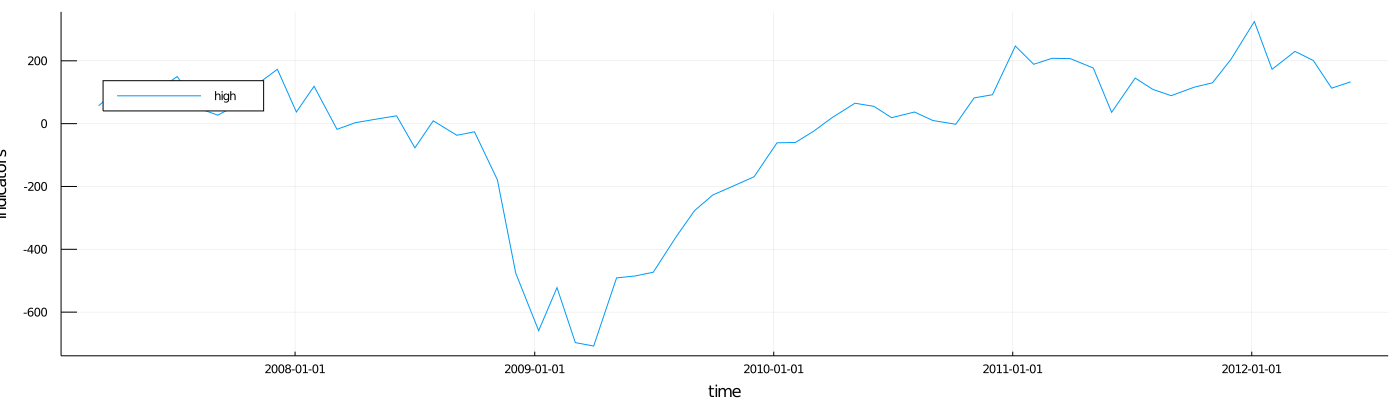

In [5]:
using Plots

rows = 100:163
gr()
plot(df[ rows,1 ], 
    [ df[rows,2]   ], 
    label    = ["high" "low" "adjusted" "volume"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1400, 400), # width, height
    layout = (1, 1)
    )